## Initial LSTM Trials

In [2]:
import pandas as pd
print(pd.__version__)
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, GRU
from tensorflow.keras.models import Sequential

1.1.5


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/BT4222Project/sent_train.pkl')
# df_train = df_train.drop_duplicates(subset=['raw_clause'])
df_train

,index,feature,raw_clause,clause_vector,clause_polarity
0,154,review,Thank you for leaving a review,"[[-0.49886, 0.76602, 0.89751, -0.78547, -0.685...",0.00
0,154,dinner,\r\n\r\n Restaurant Ibid is now re - opened fo...,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.00
0,154,Mondays,\r\n\r\n Restaurant Ibid is now re - opened fo...,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.00
0,154,forwards,\r\n\r\n Looking forwards to hosting you,"[[0.29756, 0.70983, 0.65643, -1.3487, -0.41072...",0.00
0,154,reservations,reservations are highly recommended,"[[-0.13411, -0.39639, 0.64715, 0.38583, -0.225...",0.16
...,...,...,...,...,...
0,83,vegetarian,Came in vegetarian,"[[0.085703, -0.22201, 0.16569, 0.13373, 0.3823...",0.00
0,83,sauces,The sauces,"[[-0.66793, 0.45105, -0.37039, -0.29082, 0.241...",0.00
0,83,steak,came out wanting to eat more steak,"[[0.27455, -0.0093143, 0.50753, -0.43629, 0.24...",0.50
0,83,service,service and,"[[-0.4224, -0.13313, -0.41418, -0.23677, 0.190...",0.00


In [4]:
df_val = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/BT4222Project/sent_datasets/sent_validate.pkl')
# df_val = df_val.drop_duplicates(subset=['raw_clause'])
df_val

,index,feature,raw_clause,clause_vector,clause_polarity
0,296,friends,Outdoor is kinda hot to chill with friends,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.25
0,296,Customer,Customer service good,"[[-0.4224, -0.13313, -0.41418, -0.23677, 0.190...",0.70
0,296,service,Customer service good,"[[-0.4224, -0.13313, -0.41418, -0.23677, 0.190...",0.70
0,112,review,Thank you for leaving a review,"[[-0.49886, 0.76602, 0.89751, -0.78547, -0.685...",0.00
0,112,dinner,\r\n\r\n Restaurant Ibid is now re - opened fo...,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.00
...,...,...,...,...,...
0,51,steak,this is steak heaven,"[[-0.57058, 0.44183, 0.70102, -0.41713, -0.340...",0.00
0,51,experience,was whisked away to a unforgettable experience...,"[[0.13717, -0.54287, 0.19419, -0.29953, 0.1754...",0.80
0,51,crusty,was whisked away to a unforgettable experience...,"[[0.13717, -0.54287, 0.19419, -0.29953, 0.1754...",0.80
0,51,cut,go for the early cut menu,"[[-0.078894, 0.4616, 0.57779, -0.71637, -0.131...",0.10


In [5]:
df_test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/BT4222Project/sent_datasets/sent_test.pkl')
# df_test = df_test.drop_duplicates(subset=['raw_clause'])
df_test

,index,feature,raw_clause,clause_vector,clause_polarity
0,176,burger,I have nt had such a delicious burger is a while,"[[0.15711, 0.65606, 0.0021149, -0.65144, -0.28...",0.5
0,176,while,I have nt had such a delicious burger is a while,"[[0.15711, 0.65606, 0.0021149, -0.65144, -0.28...",0.5
0,176,burgers,Great burgers at reasonable prices,"[[-0.42404, 0.0074403, -0.4665, -0.42496, -0.5...",0.5
0,176,prices,Great burgers at reasonable prices,"[[-0.42404, 0.0074403, -0.4665, -0.42496, -0.5...",0.5
0,176,Onion,Onion rings are crispy awesome too,"[[0.65609, 0.03754, -0.14359, -0.47495, 0.8703...",1.0
...,...,...,...,...,...
0,497,service,excellent service,"[[-0.2816, 0.18427, -0.06755, 0.27694, -0.0667...",1.0
0,497,porterhouse,the porterhouse and,"[[-0.038194, -0.24487, 0.72812, -0.39961, 0.08...",0.0
0,497,couple,a couple dozen oysters,"[[-0.27086, 0.044006, -0.02026, -0.17395, 0.64...",0.0
0,497,dozen,a couple dozen oysters,"[[-0.27086, 0.044006, -0.02026, -0.17395, 0.64...",0.0


In [ ]:
def myfunc(polarity):
    if polarity<=0.25:
        age=0 # Really bad
    elif polarity>0.25 and polarity<= 0.5:
        age=1 # Okay
    elif polarity>0.5 and polarity<= 0.75:
        age=2 # Good
    else:
        age=3 # Really Good
    return age

In [ ]:
df_train['sentiment'] = np.where(df_train['clause_polarity'] >= 0.0, 1, 0)
# df_train['sentiment'] = df_train.apply(lambda x : myfunc(x['clause_polarity']),axis = 1)
df_train.head()

,index,feature,raw_clause,clause_vector,clause_polarity,sentiment
0,154,review,Thank you for leaving a review,"[[-0.49886, 0.76602, 0.89751, -0.78547, -0.685...",0.00,1
0,154,dinner,\r\n\r\n Restaurant Ibid is now re - opened fo...,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.00,1
0,154,Mondays,\r\n\r\n Restaurant Ibid is now re - opened fo...,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.00,1
0,154,forwards,\r\n\r\n Looking forwards to hosting you,"[[0.29756, 0.70983, 0.65643, -1.3487, -0.41072...",0.00,1
0,154,reservations,reservations are highly recommended,"[[-0.13411, -0.39639, 0.64715, 0.38583, -0.225...",0.16,1


In [ ]:
df_test['sentiment'] = np.where(df_test['clause_polarity'] >= 0.0, 1, 0)
# df_test['sentiment'] = df_test.apply(lambda x : myfunc(x['clause_polarity']),axis = 1)
df_test.head()

,index,feature,raw_clause,clause_vector,clause_polarity,sentiment
0,176,burger,I have nt had such a delicious burger is a while,"[[0.15711, 0.65606, 0.0021149, -0.65144, -0.28...",0.5,1
0,176,while,I have nt had such a delicious burger is a while,"[[0.15711, 0.65606, 0.0021149, -0.65144, -0.28...",0.5,1
0,176,burgers,Great burgers at reasonable prices,"[[-0.42404, 0.0074403, -0.4665, -0.42496, -0.5...",0.5,1
0,176,prices,Great burgers at reasonable prices,"[[-0.42404, 0.0074403, -0.4665, -0.42496, -0.5...",0.5,1
0,176,Onion,Onion rings are crispy awesome too,"[[0.65609, 0.03754, -0.14359, -0.47495, 0.8703...",1.0,1


In [ ]:
df_val['sentiment'] = np.where(df_val['clause_polarity'] >= 0.0, 1, 0)
# df_val['sentiment'] = df_val.apply(lambda x : myfunc(x['clause_polarity']),axis = 1)
df_val.head()

,index,feature,raw_clause,clause_vector,clause_polarity,sentiment
0,296,friends,Outdoor is kinda hot to chill with friends,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.25,1
0,296,Customer,Customer service good,"[[-0.4224, -0.13313, -0.41418, -0.23677, 0.190...",0.70,1
0,296,service,Customer service good,"[[-0.4224, -0.13313, -0.41418, -0.23677, 0.190...",0.70,1
0,112,review,Thank you for leaving a review,"[[-0.49886, 0.76602, 0.89751, -0.78547, -0.685...",0.00,1
0,112,dinner,\r\n\r\n Restaurant Ibid is now re - opened fo...,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.00,1


In [ ]:
maxlen=100
num_words=20000
texts = np.array(df_train.raw_clause)
labels = np.array(df_train.clause_polarity)
# labels = tf.keras.utils.to_categorical(labels)
# labels

In [ ]:
tokenizer = Tokenizer(num_words=num_words) 

# tokenizing based on "texts". This step generates the word_index and map each word to an integer other than 0.
tokenizer.fit_on_texts(texts)

# generating sequence based on tokenizer's word_index. Each sentence will now be represented by combination of numericals
# Example: "Good movie" may be represented by [22, 37]
seq = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
# padding each numerical representation of sentence to have fixed length.

padded_seq = np.array(pad_sequences(seq,maxlen=maxlen))
print("Data converted to Sequences...")

Data converted to Sequences...


In [ ]:
#For Test Data
texts_test = np.array(df_test.raw_clause)
labels_test = np.array(df_test.clause_polarity)
# labels_test = tf.keras.utils.to_categorical(labels_test)
tokenizer_test = Tokenizer(num_words=num_words) 

# tokenizing based on "texts". This step generates the word_index and map each word to an integer other than 0.
tokenizer_test.fit_on_texts(texts_test)

# generating sequence based on tokenizer's word_index. Each sentence will now be represented by combination of numericals
# Example: "Good movie" may be represented by [22, 37]
seq_test = tokenizer_test.texts_to_sequences(texts_test)

word_index_test = tokenizer_test.word_index
# padding each numerical representation of sentence to have fixed length.

padded_seq_test = np.array(pad_sequences(seq_test,maxlen=maxlen))
print("Test Data converted to Sequences...")

Test Data converted to Sequences...


In [ ]:
#For Validation Data
texts_val = np.array(df_val.raw_clause)
labels_val = np.array(df_val.clause_polarity)
# labels_val = tf.keras.utils.to_categorical(labels_val)
tokenizer_val = Tokenizer(num_words=num_words) 

# tokenizing based on "texts". This step generates the word_index and map each word to an integer other than 0.
tokenizer_val.fit_on_texts(texts_val)

# generating sequence based on tokenizer's word_index. Each sentence will now be represented by combination of numericals
# Example: "Good movie" may be represented by [22, 37]
seq_val = tokenizer_val.texts_to_sequences(texts_val)

word_index_val = tokenizer_val.word_index
# padding each numerical representation of sentence to have fixed length.

padded_seq_val = np.array(pad_sequences(seq_val,maxlen=maxlen))
print("Val Data converted to Sequences...")

Val Data converted to Sequences...


In [ ]:
from tensorflow.keras import layers
# # A integer input for vocab indices.
# inputs = tf.keras.Input(shape=(None,), dtype="int64")

# # Next, we add a layer to map those vocab indices into a space of dimensionality
# # 'embedding_dim'.
# x = layers.Embedding(num_words, 128, input_length = maxlen)(inputs)
# x = layers.Dropout(0.5)(x)

# # Conv1D + global max pooling
# x = layers.LSTM(128, return_sequences=True)(x)
# # x = layers.LSTM(64, return_sequences=True)(x)
# x = layers.GlobalMaxPooling1D()(x)

# # We add a vanilla hidden layer:
# # x = layers.Dense(128, activation="relu")(x)
# x = layers.Flatten()(x)
# x = layers.Dropout(0.5)(x)

# # We project onto a single unit output layer, and squash it with a sigmoid:
# predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

# model = tf.keras.Model(inputs, predictions)
model = Sequential()
embedding = layers.Embedding(num_words, 32, input_length = maxlen, name = 'embedding')
# model.add(inputs)
model.add(embedding)
# model.add(layers.Dropout(0.7))
model.add(layers.GRU(32))
# model.add(LSTM(32))
# model.add(layers.Dropout(0.5))
# model.add(Flatten())
# model.add(layers.Dense(32, activation="relu"))
model.add(Dense(1,activation='sigmoid'))

# Compile the model with binary crossentropy loss and an adam optimizer.
# model.compile(loss="mse", optimizer="adam")
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
epochs = 2
# Fit the model using the train and test datasets.
model.fit(padded_seq, np.asarray(labels).astype(np.uint8), validation_data=(padded_seq_val,np.asarray(labels_val).astype(np.uint8)), epochs=epochs)

Epoch 1/2
279/279 [==============================] - 19s 61ms/step - loss: 1.0401 - accuracy: 0.8597 - precision: 0.2678 - recall: 0.7269 - val_loss: 0.6449 - val_accuracy: 0.8673 - val_precision: 0.0711 - val_recall: 0.0833
Epoch 2/2
279/279 [==============================] - 17s 61ms/step - loss: 0.1488 - accuracy: 0.9297 - precision: 0.4590 - recall: 0.6980 - val_loss: 0.8560 - val_accuracy: 0.8205 - val_precision: 0.0566 - val_recall: 0.1094


In [ ]:
model.evaluate(padded_seq_test, np.asarray(labels_test).astype(np.uint8))

94/94 [==============================] - 1s 12ms/step - loss: 2.9310 - accuracy: 0.8066 - precision: 0.0108 - recall: 0.0188


[2.930955171585083,
 0.8065816164016724,
 0.010781670920550823,
 0.018779342994093895]

In [ ]:
yhat = model.predict(padded_seq_test)
print(yhat.T)

[[ 0.40444082  0.40444082  0.30482334 ... -0.26174128 -0.26174128
  -0.26174128]]


In [ ]:
print(labels_test)

[0.5 0.5 0.5 ... 0.  0.  0. ]


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

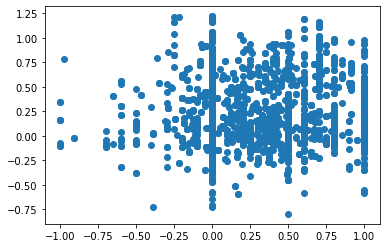

In [ ]:
plt.scatter(labels_test, yhat.T[0])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(labels_test, yhat.T[0])
mse 

0.21557156839719074

## Comparing Models


In [9]:
train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/BT4222Project/sent_train.pkl')
train.head()

,index,feature,raw_clause,clause_vector,clause_polarity
0,154,review,Thank you for leaving a review,"[[-0.49886, 0.76602, 0.89751, -0.78547, -0.685...",0.00
0,154,dinner,\r\n\r\n Restaurant Ibid is now re - opened fo...,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.00
0,154,Mondays,\r\n\r\n Restaurant Ibid is now re - opened fo...,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.00
0,154,forwards,\r\n\r\n Looking forwards to hosting you,"[[0.29756, 0.70983, 0.65643, -1.3487, -0.41072...",0.00
0,154,reservations,reservations are highly recommended,"[[-0.13411, -0.39639, 0.64715, 0.38583, -0.225...",0.16


In [10]:
test = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/BT4222Project/sent_datasets/sent_test.pkl')
test.head()

,index,feature,raw_clause,clause_vector,clause_polarity
0,176,burger,I have nt had such a delicious burger is a while,"[[0.15711, 0.65606, 0.0021149, -0.65144, -0.28...",0.5
0,176,while,I have nt had such a delicious burger is a while,"[[0.15711, 0.65606, 0.0021149, -0.65144, -0.28...",0.5
0,176,burgers,Great burgers at reasonable prices,"[[-0.42404, 0.0074403, -0.4665, -0.42496, -0.5...",0.5
0,176,prices,Great burgers at reasonable prices,"[[-0.42404, 0.0074403, -0.4665, -0.42496, -0.5...",0.5
0,176,Onion,Onion rings are crispy awesome too,"[[0.65609, 0.03754, -0.14359, -0.47495, 0.8703...",1.0


In [11]:
val = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/BT4222Project/sent_datasets/sent_validate.pkl')
val.head()

,index,feature,raw_clause,clause_vector,clause_polarity
0,296,friends,Outdoor is kinda hot to chill with friends,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.25
0,296,Customer,Customer service good,"[[-0.4224, -0.13313, -0.41418, -0.23677, 0.190...",0.70
0,296,service,Customer service good,"[[-0.4224, -0.13313, -0.41418, -0.23677, 0.190...",0.70
0,112,review,Thank you for leaving a review,"[[-0.49886, 0.76602, 0.89751, -0.78547, -0.685...",0.00
0,112,dinner,\r\n\r\n Restaurant Ibid is now re - opened fo...,"[[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...",0.00


In [12]:
number_of_most_frequent_words=10000
max_len=500

In [13]:
X_train = train['raw_clause']
y_train = train['clause_polarity']
X_val = val['raw_clause']
y_val = val['clause_polarity']
X_test = test['raw_clause']
y_test= test['clause_polarity']
# X_tp = to_pred['raw_clause']
# y_tp = to_pred['clause_polarity']

In [14]:
X_train = train['raw_clause'].to_numpy()
X_val = val['raw_clause'].to_numpy()
X_test = test['raw_clause'].to_numpy()
# X_tp = to_pred['raw_clause'].to_numpy()


In [15]:
from keras.preprocessing.text import Tokenizer
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(X_train)
X_train_tokens = tokenizer_obj.texts_to_sequences(X_train)
X_val_tokens = tokenizer_obj.texts_to_sequences(X_val)
X_test_tokens = tokenizer_obj.texts_to_sequences(X_test)
# X_tp_tokens = tokenizer_obj.texts_to_sequences(X_tp)
max_length = max([len(s.split()) for s in X_train])
vocab_size = len(tokenizer_obj.word_index) + 1

In [16]:
from keras.preprocessing.sequence import pad_sequences
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')
# X_tp_pad = pad_sequences(X_tp_tokens, maxlen=max_length, padding='post')

In [17]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr = 0.00001,verbose=1)
early = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [18]:
from tensorflow.keras import Sequential
from keras.layers import GRU,Embedding, Flatten, Conv1D, GlobalMaxPooling1D, Dropout, Dense, Input
from keras.callbacks import ReduceLROnPlateau,EarlyStopping


rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr = 0.00001,verbose=1)
early = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)
EMBEDDING_DIM = 100
model = Sequential()
e = Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length)
model.add(e)
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.MeanSquaredError()])
model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=100, batch_size=32, verbose=2, callbacks=[rlr, early])

Epoch 1/100
279/279 - 17s - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.0352 - val_mean_squared_error: 0.0352 - lr: 0.0010 - 17s/epoch - 62ms/step
Epoch 2/100
279/279 - 14s - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0279 - val_mean_squared_error: 0.0279 - lr: 0.0010 - 14s/epoch - 50ms/step
Epoch 3/100
279/279 - 14s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0314 - val_mean_squared_error: 0.0314 - lr: 0.0010 - 14s/epoch - 50ms/step
Epoch 4/100
279/279 - 14s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0242 - val_mean_squared_error: 0.0242 - lr: 0.0010 - 14s/epoch - 51ms/step
Epoch 5/100
279/279 - 14s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0286 - val_mean_squared_error: 0.0286 - lr: 0.0010 - 14s/epoch - 50ms/step
Epoch 6/100
279/279 - 14s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0217 - val_mean_squared_error: 0.0217 - lr: 0.0010 - 14s/epoch - 51ms/step
Epoch 7/100
279/279 - 14s - loss: 0.0046 - mea

In [19]:
pred = model.predict(X_test_pad)
pred

array([[ 0.46182537],
       [ 0.46182537],
       [ 0.4640682 ],
       ...,
       [-0.00350198],
       [-0.00350198],
       [-0.00350198]], dtype=float32)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

0.016434160626424523

In [21]:
# Lowest MSE so Far for LSTM = 0.014745139839149117

In [22]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr = 0.00001,verbose=1)
early = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [23]:
from tensorflow.keras import Sequential
from keras.layers import GRU,Embedding, Flatten, Conv1D, GlobalMaxPooling1D, Dropout, Dense, Input

EMBEDDING_DIM = 100
model = Sequential()
e = Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length)
model.add(e)
model.add(GRU(32))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.MeanSquaredError()])
model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=100, batch_size=32, verbose=2, callbacks=[rlr, early])

Epoch 1/100
279/279 - 9s - loss: 0.1326 - mean_squared_error: 0.1326 - val_loss: 0.1317 - val_mean_squared_error: 0.1317 - lr: 0.0010 - 9s/epoch - 33ms/step
Epoch 2/100
279/279 - 6s - loss: 0.1312 - mean_squared_error: 0.1312 - val_loss: 0.1312 - val_mean_squared_error: 0.1312 - lr: 0.0010 - 6s/epoch - 23ms/step
Epoch 3/100
279/279 - 6s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0300 - val_mean_squared_error: 0.0300 - lr: 0.0010 - 6s/epoch - 23ms/step
Epoch 4/100
279/279 - 6s - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0175 - val_mean_squared_error: 0.0175 - lr: 0.0010 - 6s/epoch - 23ms/step
Epoch 5/100
279/279 - 6s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0146 - val_mean_squared_error: 0.0146 - lr: 0.0010 - 6s/epoch - 23ms/step
Epoch 6/100
279/279 - 6s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0156 - val_mean_squared_error: 0.0156 - lr: 0.0010 - 6s/epoch - 23ms/step
Epoch 7/100
279/279 - 6s - loss: 0.0037 - mean_squared_err

In [24]:
pred_GRU = model.predict(X_test_pad)
pred_GRU

array([[0.56758916],
       [0.56758916],
       [0.4837112 ],
       ...,
       [0.2582947 ],
       [0.2582947 ],
       [0.2582947 ]], dtype=float32)

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_GRU)

0.013059795531686454

In [26]:
# Lowest for GRU = 0.012551183187498776

In [27]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr = 0.00001,verbose=1)
early = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [28]:
from tensorflow.keras import Sequential
from keras.layers import GRU,Embedding, Flatten, Conv1D, GlobalMaxPooling1D, Dropout, Dense, Input
from tensorflow.keras import layers

EMBEDDING_DIM = 100
model = Sequential()
e = Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length)
model.add(e)
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.MeanSquaredError()])
model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=100, batch_size=32, verbose=2, callbacks=[rlr, early])

Epoch 1/100
279/279 - 30s - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0311 - val_mean_squared_error: 0.0311 - lr: 0.0010 - 30s/epoch - 109ms/step
Epoch 2/100
279/279 - 25s - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0271 - val_mean_squared_error: 0.0271 - lr: 0.0010 - 25s/epoch - 91ms/step
Epoch 3/100
279/279 - 26s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0222 - val_mean_squared_error: 0.0222 - lr: 0.0010 - 26s/epoch - 92ms/step
Epoch 4/100
279/279 - 26s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0200 - val_mean_squared_error: 0.0200 - lr: 0.0010 - 26s/epoch - 93ms/step
Epoch 5/100
279/279 - 26s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0198 - val_mean_squared_error: 0.0198 - lr: 0.0010 - 26s/epoch - 92ms/step
Epoch 6/100
279/279 - 26s - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0182 - val_mean_squared_error: 0.0182 - lr: 0.0010 - 26s/epoch - 92ms/step
Epoch 7/100
279/279 - 25s - loss: 0.0035 - me

In [29]:
pred_BD = model.predict(X_test_pad)
pred_BD

array([[0.5726341 ],
       [0.5726341 ],
       [0.4432815 ],
       ...,
       [0.00255305],
       [0.00255305],
       [0.00255305]], dtype=float32)

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_BD)

0.017116518723665212

In [31]:
# For Bidirectional LSTM the value is = 0.014405696118103219

In [32]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
rlr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr = 0.00001,verbose=1)
early = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [33]:
from tensorflow.keras import Sequential
from keras.layers import GRU,Embedding, Flatten, Conv1D, GlobalMaxPooling1D, Dropout, Dense, Input
from tensorflow.keras import layers

EMBEDDING_DIM = 100
model = Sequential()
e = Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length)
model.add(e)
model.add(layers.SimpleRNN(128))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.MeanSquaredError()])
model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=100, batch_size=32, verbose=2, callbacks=[rlr, early])

Epoch 1/100
279/279 - 7s - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.0396 - val_mean_squared_error: 0.0396 - lr: 0.0010 - 7s/epoch - 25ms/step
Epoch 2/100
279/279 - 6s - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0415 - val_mean_squared_error: 0.0415 - lr: 0.0010 - 6s/epoch - 20ms/step
Epoch 3/100
279/279 - 6s - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0397 - val_mean_squared_error: 0.0397 - lr: 0.0010 - 6s/epoch - 20ms/step
Epoch 4/100
279/279 - 6s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0357 - val_mean_squared_error: 0.0357 - lr: 0.0010 - 6s/epoch - 20ms/step
Epoch 5/100
279/279 - 6s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0343 - val_mean_squared_error: 0.0343 - lr: 0.0010 - 6s/epoch - 20ms/step
Epoch 6/100
279/279 - 6s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0317 - val_mean_squared_error: 0.0317 - lr: 0.0010 - 6s/epoch - 20ms/step
Epoch 7/100
279/279 - 6s - loss: 0.0077 - mean_squared_err

In [34]:
pred_RNN = model.predict(X_test_pad)
pred_RNN

array([[ 0.66641724],
       [ 0.66641724],
       [ 0.65908015],
       ...,
       [-0.03344627],
       [-0.03344627],
       [-0.03344627]], dtype=float32)

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_RNN)

0.029044756739662943

In [36]:
# Lowest MSE for RNN = 0.02967146588746264